# SHORT TEXT TOPIC MODELLING!

In [89]:
import pandas as pd
import numpy as np
from collections import Counter

data = pd.read_csv('data/preprocessed_tweets_ar.csv',  low_memory=False) 
df = pd.DataFrame(data)
df['date'] = pd.to_datetime(data['date'])

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,مقياس,درجات,الجميع,قوية,سكان,لبنان,ارضية,يضرب,شعر,نحن,...,شي,يكون,مِنْ,قليل,حدوث,لطيف,رختر,المتوسط,به,المتضررين
1,لحظة,ريختر,الضحايا,درجة,مقياس,•,78,غازي,وقوع,عنتاب,...,77,درجات,المباني,مدن,انهيار,بلغت,فيديو,الجميع,حالة,الآن
2,78,درجة,مَا,المباني,الضحايا,عنا,لحظة,فجر,السورية,الدمار,...,انهيار,يضرب,غازي,نتيجة,237,السلامة,للجميع,هاتاي,حدوث,وما
3,المصابين,حدوث,مناطق,يرحم,انهيار,رحمتك,به,الضحايا,مشاهد,فيها,...,الجرحى,صباح,انا,الارض,وقت,بسبب,احفظ,فجر,رحم,ويشفي
4,الضحايا,بسبب,درجة,البلاد,78,جديدة,يرحم,912,رحمتك,جرحاهم,...,المصابين,جنوبي,لحظة,الآن,سلم,منذ,العظيم,قتيلا,السورية,المدني


In [4]:
# Set start of binning to lowest date
start_datetime = df['date'].min()

# Set the 'timestamp' column as the index
df.set_index('date', inplace=True)

# Create bins based on 2 hour steps
bins = pd.date_range(start=start_datetime, periods=(len(df) // 2) + 1, freq='2H')
dfs = [group for _, group in df.groupby(pd.cut(df.index, bins))]
dfs = dfs[:50] # Cutoff at 50 bins, data too sparse after that 
print(len(dfs))

50


In [5]:
# Get list of words per bin
words_per_bin = []

for bin in dfs:
    string = ''.join(np.array(bin['content'].astype(str)))
    list = string.split(' ')
    list = [word for word in list if word != '']
    words_per_bin.append(list)

print(words_per_bin)

[['المركز', 'الأوروبي', 'المتوسطي', 'لرصد', 'الزلازل', 'يقول', 'إنه', 'يجري', 'تقييما', 'بشأن', 'احتمال', 'حدوث', 'موجات', 'مد', 'عملاقة', 'الدني', 'برا', 'مجنونة', 'العواصف', 'والرياح', 'والشتا', 'كيف', 'الناس', 'بالشوارع', 'مع', 'اولادهم', 'ليلة', 'غريبة', 'يا', 'لطيف', 'صور', 'صادمة', 'لحجم', 'الدمار', 'الذي', 'خلفه', 'الزلزال', 'الذي', 'ضرب', 'تركيا', 'وإمتد', 'إلى', 'عديد', 'الدول', 'قبل', 'لحظات', 'من', 'الآن', 'في', 'أولى', 'الأنباء', '،', 'تسجيل', 'عدد', 'من', 'الوفيات', 'في', 'كل', 'من', 'تركيا', 'وسوريا', 'من', 'بينهم', 'أطفال', 'وضحايا', 'تحت', 'الأنقاض', 'اللهم', 'لطفك', 'يا', 'رب', 'العالمين', 'مشهد', 'مرعب', 'اللهم', 'يا', 'خفي', 'الألطاف', 'يا', 'الله', 'الطف', 'بالناس', 'جميعا', 'الناس', 'في', 'الشوارع', 'والأبنية', 'تنهار', 'على', 'النائمين', 'مركزه', 'في', 'و', 'شمال', 'تصل', 'اثاره', 'الى', 'و', 'ْلسطٮِںْ', 'سبحان', 'الله', 'اللهم', 'أحفظهم', 'اللهم', 'لطفك', 'زلزال', 'في', 'قوته', '78', 'على', 'مقياس', 'رختر', 'ويعتبر', 'زلزال', 'عنيف', 'و', 'يخشى', 'من', 'تسونامي',

In [6]:
words_np = np.array(words_per_bin)
unique_words = np.unique(words_np)

my_dict = {}

# Create occurence dictionary entry for each word
for i, words in enumerate(words_per_bin):
    counts = Counter(words)
    result = counts.most_common()
    top_cts = result[:50]

    # For each counter elem (word, occurence amount)
    for elem in top_cts:
        key = elem[0]
        num = elem[1]
        if key in my_dict:
            my_dict[key][0] += num # Add occurence amount
            my_dict[key][1] += 1 # How many bins the word occurs in
        else:
            # Key doesn't exist, create a new entry with the values
            my_dict[key] = [num, 1]
print()

C:\Users\frans\AppData\Local\Temp\ipykernel_23340\4158168235.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  words_np = np.array(words_per_bin)


In [7]:
sorted_dict = dict(sorted(my_dict.items(), key=lambda x: x[1][1], reverse=True))
print(sorted_dict)

treshold = 5  # Maximum amount of bins a word can occur in
filtered_words = [item[0] for item in sorted_dict.items() if item[1][1] > treshold] # Fetch words that occur in more than treshold bins
print("Filtered:", len(filtered_words), "words:", filtered_words)

{'في': [7316, 50], 'من': [5850, 50], 'و': [3910, 50], 'على': [2191, 50], 'الله': [3120, 50], 'تركيا': [1771, 49], 'سوريا': [1822, 49], 'ما': [1194, 48], 'الزلزال': [2384, 47], 'لا': [1624, 47], 'كل': [1216, 47], 'تحت': [1421, 46], 'عن': [888, 45], 'إلى': [1475, 45], 'اللهم': [3283, 44], '،': [1250, 44], 'يا': [1606, 43], 'بعد': [833, 43], 'الذي': [880, 42], 'أن': [697, 42], 'الأنقاض': [698, 39], 'مع': [740, 36], 'التي': [543, 36], 'السوري': [542, 35], 'ولا': [894, 31], 'ضحايا': [623, 31], 'يارب': [852, 30], 'زلزال': [686, 29], 'عدد': [398, 28], 'وتركيا': [445, 25], 'الزلازل': [438, 24], 'المساعدات': [182, 24], 'ارتفاع': [250, 22], 'هذا': [316, 21], 'التركية': [286, 21], 'التركي': [311, 21], 'رب': [462, 20], 'اليوم': [381, 18], 'حتى': [168, 18], 'إنقاذ': [206, 18], 'ضرب': [336, 17], 'وسوريا': [366, 17], 'هذه': [149, 16], 'إلا': [283, 16], 'المسلمين': [437, 15], 'ارحم': [410, 14], 'قبل': [183, 13], 'لطفك': [324, 13], 'الطف': [389, 12], 'لم': [115, 12], 'الى': [99, 11], 'جراء': [178, 11],

In [8]:
# Obtain the per-bin counts by using
# the Counter class on each list of words
# for a given bin. Also filter out words that
# occur in too many bins.
per_bin_cts = []

# Loop through each bin, filter and then display occurence counts
for i, word_bin in enumerate(words_per_bin):
    removed = np.unique(np.array([x for x in word_bin if x in filtered_words])) # Debug only, get amount of removed words
    word_bin = [x for x in word_bin if x not in filtered_words] # Filter out words that occur in too many bins
    #print("Filtered: {} words".format(len(removed)))

    if(len(word_bin) == 0): # Filter empty bins
        continue

    # Count occurences of words in bin
    # sort by most common, append that to per_bin_cts
    counts = Counter(word_bin)
    top_results = counts.most_common()
    top_counts = top_results[:25]
    per_bin_cts.append(top_counts)

print(per_bin_cts)
print(len(per_bin_cts))



[[('مقياس', 10), ('درجات', 10), ('الجميع', 9), ('قوية', 9), ('سكان', 8), ('لبنان', 8), ('ارضية', 8), ('يضرب', 8), ('شعر', 7), ('نحن', 7), ('أرضية', 7), ('77', 7), ('ريختر', 7), ('78', 6), ('ع', 6), ('شي', 6), ('يكون', 6), ('مِنْ', 6), ('قليل', 6), ('حدوث', 5), ('لطيف', 5), ('رختر', 5), ('المتوسط', 5), ('به', 5), ('المتضررين', 5)], [('لحظة', 17), ('ريختر', 15), ('الضحايا', 15), ('درجة', 15), ('مقياس', 14), ('•', 14), ('78', 13), ('غازي', 13), ('وقوع', 12), ('عنتاب', 12), ('سلم', 12), ('مبنى', 11), ('حدوث', 10), ('يضرب', 10), ('داخل', 10), ('77', 9), ('درجات', 9), ('المباني', 9), ('مدن', 9), ('انهيار', 9), ('بلغت', 9), ('فيديو', 9), ('الجميع', 8), ('حالة', 8), ('الآن', 8)], [('78', 16), ('درجة', 14), ('مَا', 11), ('المباني', 9), ('الضحايا', 9), ('عنا', 9), ('لحظة', 8), ('فجر', 8), ('السورية', 8), ('الدمار', 7), ('لبنان', 7), ('عنتاب', 7), ('المساعدة', 7), ('المنطقة', 7), ('رحم', 6), ('انهيار', 6), ('يضرب', 6), ('غازي', 6), ('نتيجة', 6), ('237', 6), ('السلامة', 6), ('للجميع', 6), ('هاتاي'

# Visualisation

In [ ]:
per_bin_words = []
for bin in per_bin_cts:
    words_bin = []
    for words in bin:
        words_bin.append(words[0])
    per_bin_words.append(words_bin)

# To dataframe for saving
top_words = pd.DataFrame(per_bin_words)
print(len(per_bin_words))
#top_words.to_csv('data/output/top_25words_per_bin_ar.csv',index=False)



# Translation

In [92]:
from deep_translator import GoogleTranslator
from num2words import num2words

top_words = pd.read_csv('data/output/top_25words_per_bin_tur.csv',  low_memory=False) 

# Translate
def translate(words_list):
    translated = GoogleTranslator(source='tr', target='en')
    total_trans = []
    # Filter all numerical words and replace them by textual representation
    # because this blows up Google Translate
    for list in words_list:
        for i, word in enumerate(list):
            if is_numerical(word):
                list[i] = num2words(int(word), lang='en')

    # loop through processed words_list, translate each list
    # and append to total_trans
    for processed_words in words_list:
         trans = translated.translate_batch(processed_words)
         total_trans.append(trans)

    return total_trans

def is_numerical(string):
    return string.isdigit()

word_list = top_words.values.tolist()
translated = translate(word_list)
translated_df = pd.DataFrame(translated)


print(translated)
translated_df.to_csv('data/output/top_25_per_bin_tur_TRANSLATED.csv',index=False)

KeyboardInterrupt: 

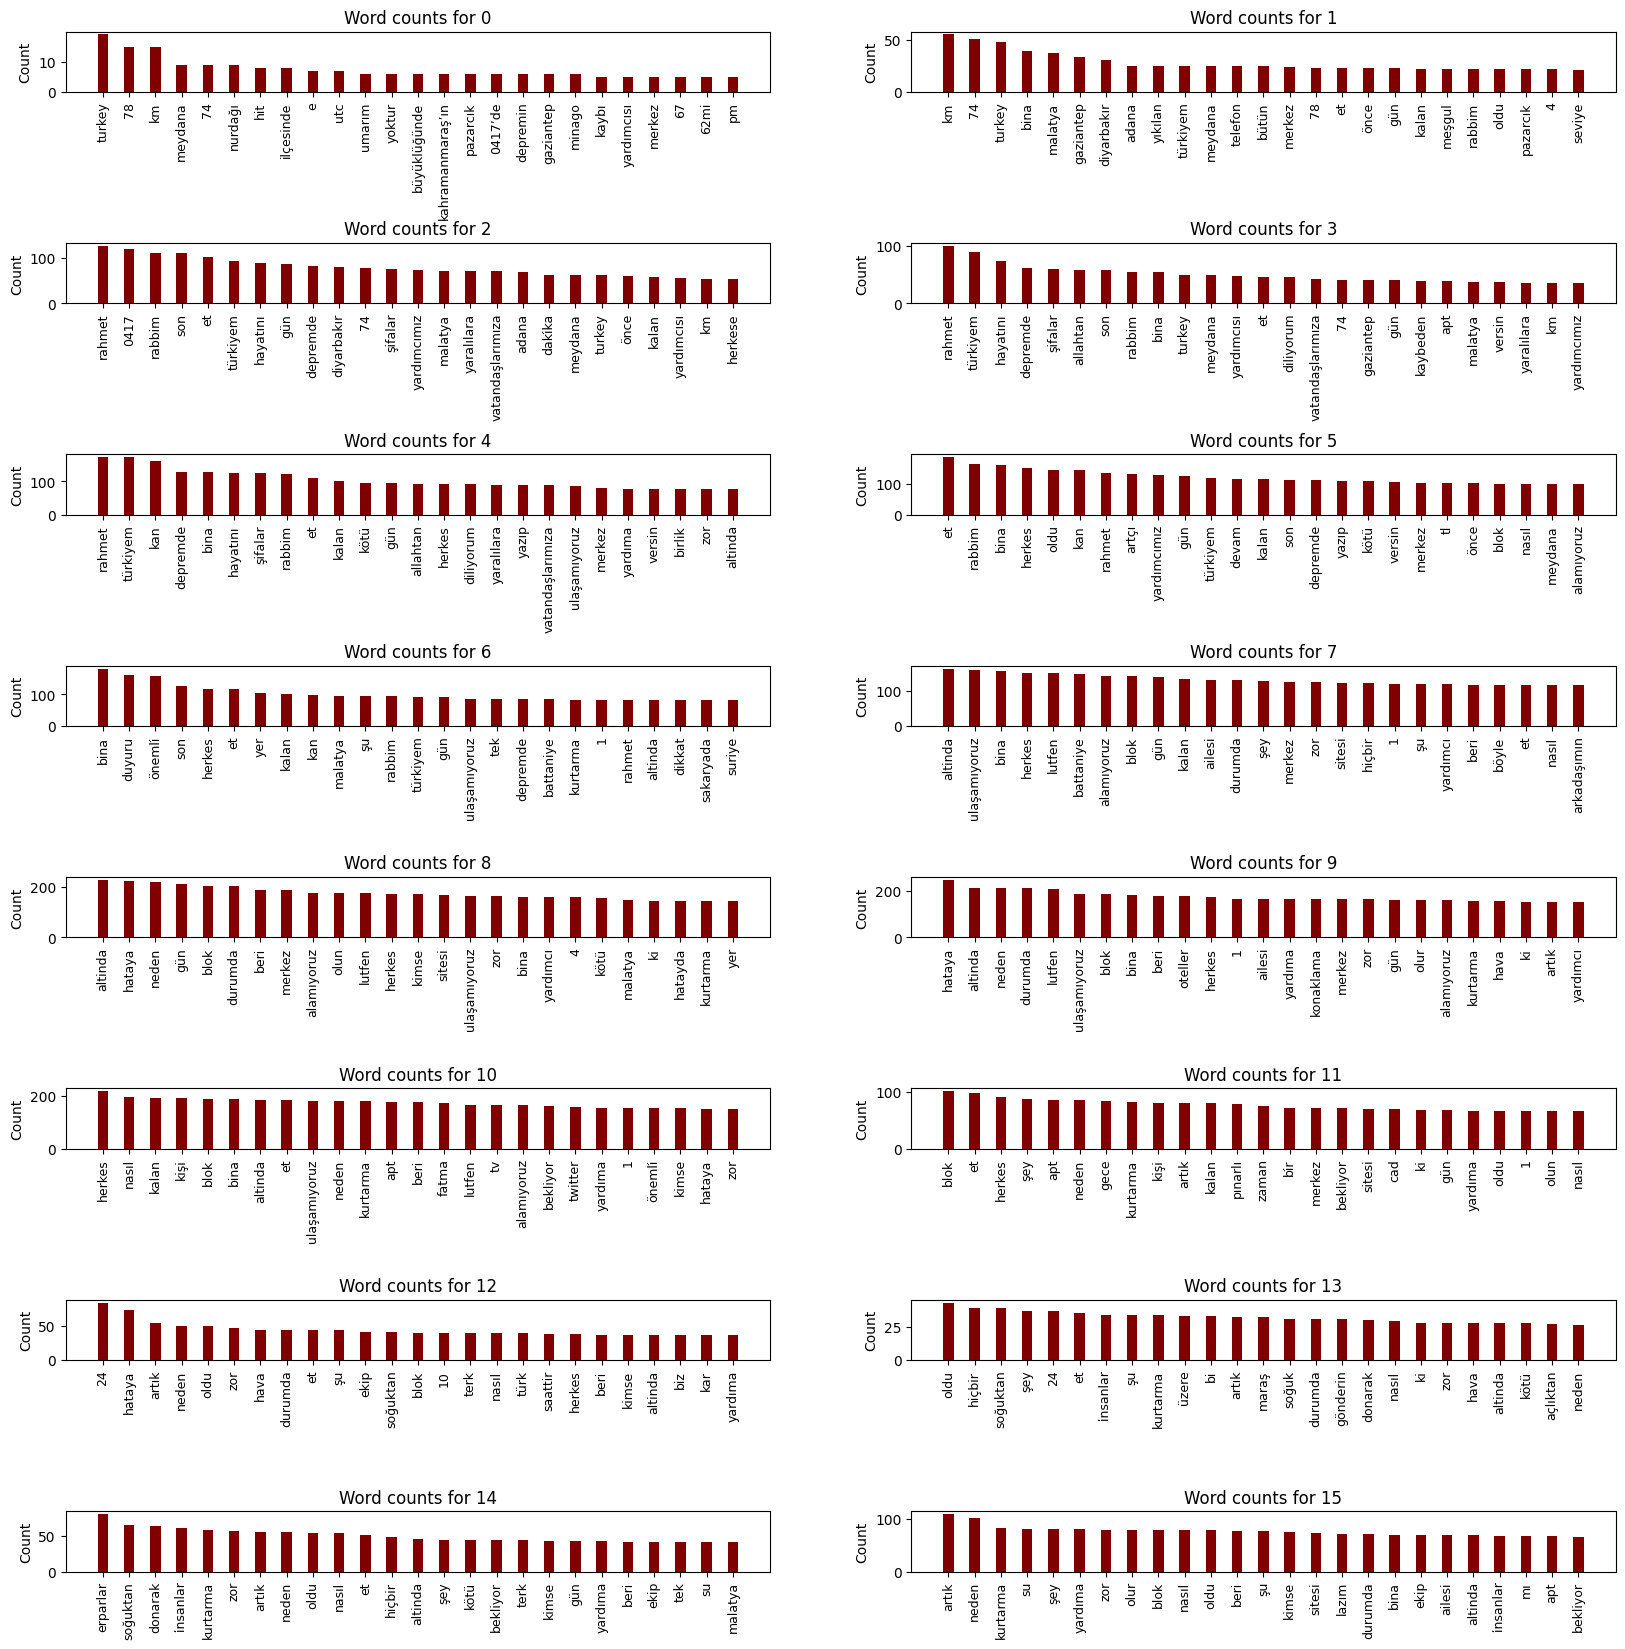

In [54]:
import matplotlib.pyplot as plt

def plot_bins(start=0, end=16):
    fig, axs = plt.subplots(nrows=8, ncols=2, figsize=(20, 20))

    for num, ax in zip(range(start, end), axs.flatten()):
        words = [item[0] for item in per_bin_cts[num]]
        values = [item[1] for item in per_bin_cts[num]]

        # creating the bar plot
        ax.bar(words, values, color='maroon', width=0.4)

        ax.set_xticks(words)
        ax.tick_params(axis='x', labelrotation=90, labelsize=9)
        ax.set_ylabel("Count")
        ax.set_title("Word counts for {}".format(num))

    plt.subplots_adjust(hspace=2.5)  # Increase the vertical spacing between subplots
    plt.show()

plot_bins()

In [82]:
# TODO:
# Filter out common words that occur in each bin
# try n-grams (bigrams, trigrams, etc.)
# https://github.com/OpenNMT/OpenNMT-py 
